In [1]:
!pip install datasets peft

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 8.8 MB/s eta 0:00:00


In [ ]:
pip install trl

In [2]:
!pip install -U git+https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

  Cloning https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git to /tmp/pip-req-build-d2bxqnwm
  Running command git clone --filter=blob:none --quiet https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git /tmp/pip-req-build-d2bxqnwm
  Resolved https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git to commit b17a265d3b8253424e5b38872457f7437909a65d
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.8/76.8 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [3]:
!pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 3.7 MB/s eta 0:00:00


In [ ]:
%%capture
%pip install accelerate peft bitsandbytes transformers trl

In [4]:
import lucem_illud

#All these packages need to be installed from pip
#For ML
import sklearn
# import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition

   #module 'numpy' has no attribute 'bool'

import numpy as np #arrays
import matplotlib.pyplot as plt #Plots
import matplotlib.colors # For nice colours
import seaborn #Makes plots look nice, also heatmaps
import scipy as sp #for interp

np.float = float
np.int = int   #module 'numpy' has no attribute 'int'
np.object = object    #module 'numpy' has no attribute 'object'
np.bool = bool

import pyanno #On python3 make sure to pip install pyanno3

#We need to import these this way due to how pyanno is setup
from pyanno.measures import pairwise_matrix, agreement, cohens_kappa, cohens_weighted_kappa, fleiss_kappa, krippendorffs_alpha, pearsons_rho, scotts_pi, spearmans_rho
from pyanno.annotations import AnnotationsContainer
from pyanno.models import ModelA, ModelBt, ModelB

from functools import reduce
from itertools import permutations
import math

#These are from the standard library
import collections
import os
import os.path
import random
import re
import glob
import pandas as pd
import requests
import json
import math

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

In [ ]:

#import for LLM
import os
import sys
from typing import List


import torch
import transformers
from datasets import load_dataset
from peft import (  # noqa: E402
    LoraConfig,
    get_peft_model,
    get_peft_model_state_dict,
    prepare_model_for_int8_training,
    set_peft_model_state_dict,
)
from transformers import LlamaForCausalLM, LlamaTokenizer
import os
import torch
from datasets import load_dataset
from transformers import (
    AutoModelForCausalLM,
    AutoTokenizer,
    BitsAndBytesConfig,
    HfArgumentParser,
    TrainingArguments,
    pipeline,
    logging,
)
from peft import LoraConfig, PeftModel
from trl import SFTTrainer

In [5]:
# Read corpus with annotations into dataframe
file_path = './data/BBC_News_annotated.csv'
df1 = pd.read_csv(file_path)
df1 = df1[df1['Text_Content'].notna() & (df1['Text_Content'] != '')]
df1['Category'] = 'BBC'

file_path = './data/BECK_News_annotated.csv'
df2 = pd.read_csv(file_path)
df2 = df2[df2['Text_Content'].notna() & (df2['Text_Content'] != '')]
df2['Category'] = 'BECK'

file_path = './data/CNN_News_annotated.csv'
df3 = pd.read_csv(file_path)
df3 = df3[df3['Text_Content'].notna() & (df3['Text_Content'] != '')]
df3['Category'] = 'CNN'

file_path = './data/FOX_News_annotated.csv'
df4 = pd.read_csv(file_path)
df4 = df4[df4['Text_Content'].notna() & (df4['Text_Content'] != '')]
df4['Category'] = 'FOX'

df = pd.concat([df1, df2, df3, df4],ignore_index=True)


unnamed_cols = [col for col in df.columns if col.startswith('Unnamed')]
df = df.drop(columns=unnamed_cols)
annotator_columns = ['Annotator_1', 'Annotator_2', 'Annotator_3']
for column in annotator_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')


df['average'] = df[annotator_columns].mean(axis=1, skipna=True)

In [6]:
df

,File_Name,Text_Content,Annotator_1,Annotator_2,Annotator_3,Category,average
0,BBCNews_1,Pope Francis is evicting US Cardinal Raymond B...,2.0,NaN,2.0,BBC,2.0
1,BBCNews_2,Chileans are voting in a referendum to decide ...,0.0,NaN,1.0,BBC,0.5
2,BBCNews_3,Medical providers and fertility patients in Al...,4.0,NaN,1.0,BBC,2.5
3,BBCNews_4,You probably shouldn't play Kim Petras's new E...,2.0,NaN,2.0,BBC,2.0
4,BBCNews_5,It was a political grenade in the form of a 34...,3.0,NaN,2.0,BBC,2.5
...,...,...,...,...,...,...,...
320,FoxNews_55,Former Vice President Mike Pence goes after Ni...,NaN,-3.0,-2.0,FOX,-2.5
321,FoxNews_56,"Republican Sen. Tim Scott of South Carolina, s...",NaN,-3.0,-3.0,FOX,-3.0
322,FoxNews_57,Republican presidential candidate Nikki Haley ...,NaN,-4.0,-4.0,FOX,-4.0
323,FoxNews_58,Progressive pro-life activist Terrisa Bukovina...,NaN,-3.0,-2.0,FOX,-2.5


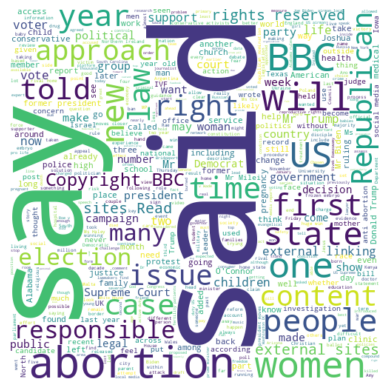

In [8]:
from wordcloud import WordCloud

word_samples = df[df['Category'] == 'BBC']

text = ' '.join(word_samples['Text_Content'].dropna())

wc = WordCloud(background_color="white", max_words=500, width=1000, height=1000, mode='RGBA', scale=.5).generate(text)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

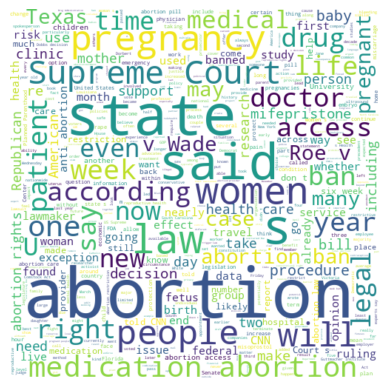

In [9]:
word_samples = df[df['Category'] == 'CNN']

text = ' '.join(word_samples['Text_Content'].dropna())

wc = WordCloud(background_color="white", max_words=500, width=1000, height=1000, mode='RGBA', scale=.5).generate(text)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

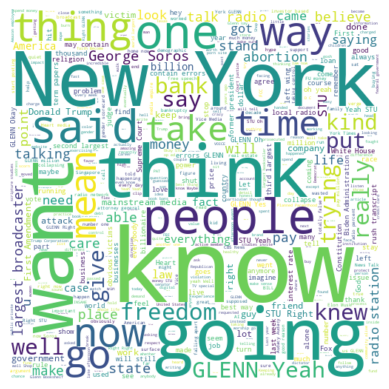

In [10]:
word_samples = df[df['Category'] == 'BECK']

text = ' '.join(word_samples['Text_Content'].dropna())

wc = WordCloud(background_color="white", max_words=500, width=1000, height=1000, mode='RGBA', scale=.5).generate(text)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

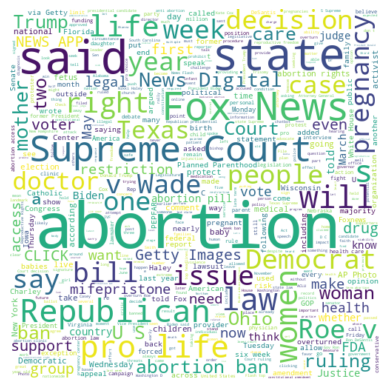

In [11]:
word_samples = df[df['Category'] == 'FOX']

text = ' '.join(word_samples['Text_Content'].dropna())

wc = WordCloud(background_color="white", max_words=500, width=1000, height=1000, mode='RGBA', scale=.5).generate(text)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Process the data with annotations

In [12]:
annotator_columns = df[['Annotator_1', 'Annotator_2', 'Annotator_3']]
annotator_columns_filled = annotator_columns.fillna(-100)
annotations_array = annotator_columns_filled.to_numpy()
MyAnno = AnnotationsContainer.from_array(annotations_array, missing_values=[-100])

[[ 2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  1.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  2.  1.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  3.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  1.  3.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  2.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  2.  2.  3.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  1.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1. 11.  5.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  4.  7.  0.  0.  0.

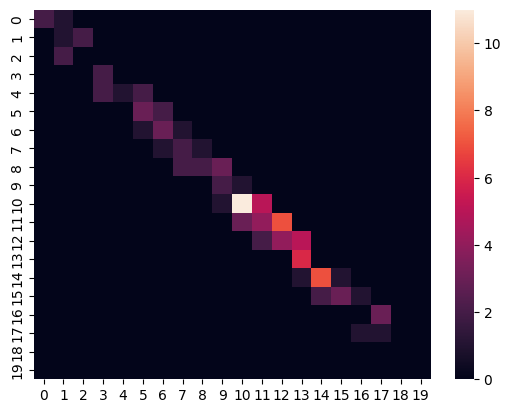

In [13]:
c = pyanno.measures.agreement.confusion_matrix(MyAnno.annotations[:,0], MyAnno.annotations[:,1],20)
print(c)
ac = seaborn.heatmap(c)
plt.show()

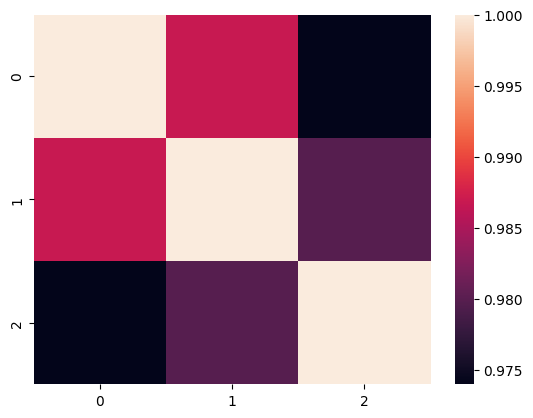

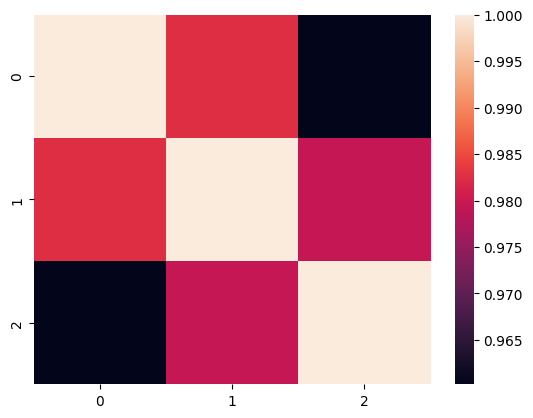

In [14]:
n = pairwise_matrix(pearsons_rho, MyAnno.annotations)
m = pairwise_matrix(spearmans_rho, MyAnno.annotations)
an = seaborn.heatmap(n)
plt.show()
am = seaborn.heatmap(m)
plt.show()

In [15]:
fleiss_kappa(MyAnno.annotations[::])

0.4323492009989429

Text Embeddings

In [17]:
# Improt Sentence BERT
from sentence_transformers import SentenceTransformer
model = SentenceTransformer("all-MiniLM-L6-v2")


# Sentences are encoded by calling model.encode()
embeddings = model.encode(df['Text_Content'].tolist(), show_progress_bar=True)

df['Text_Content_Embedding'] = list(embeddings)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/11 [00:00<?, ?it/s]

In [18]:
# Train MLP modol
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier


X = np.stack(df['Text_Content_Embedding'], axis=0)  # Features

y = df['Category'].values  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf_nn = MLPClassifier(max_iter=1000)  # Increasing max_iter for convergence
clf_nn.fit(X_train, y_train)

MLPClassifier(max_iter=1000)

In [19]:
from sklearn.metrics import accuracy_score

y_pred = clf_nn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy * 100:.2f}%")

Model accuracy: 86.15%


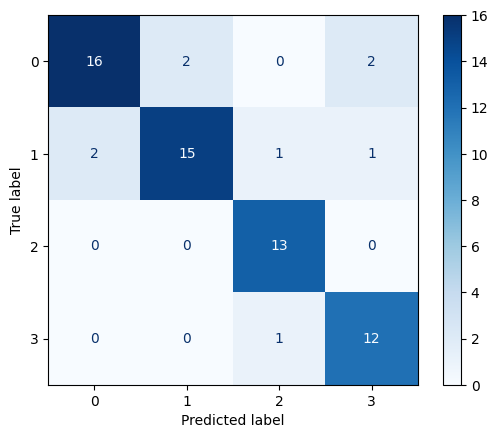

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


y_pred = clf_nn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

Cluster Analysis

In [21]:
X = np.array(df['Text_Content_Embedding'].tolist())

In [22]:
sampled_df = df.groupby('Category').apply(lambda x: x.sample(n=50)).reset_index(drop=True)

In [23]:
sampled_df
y_sample = sampled_df['Category'].values
X = np.array(sampled_df['Text_Content_Embedding'].tolist())

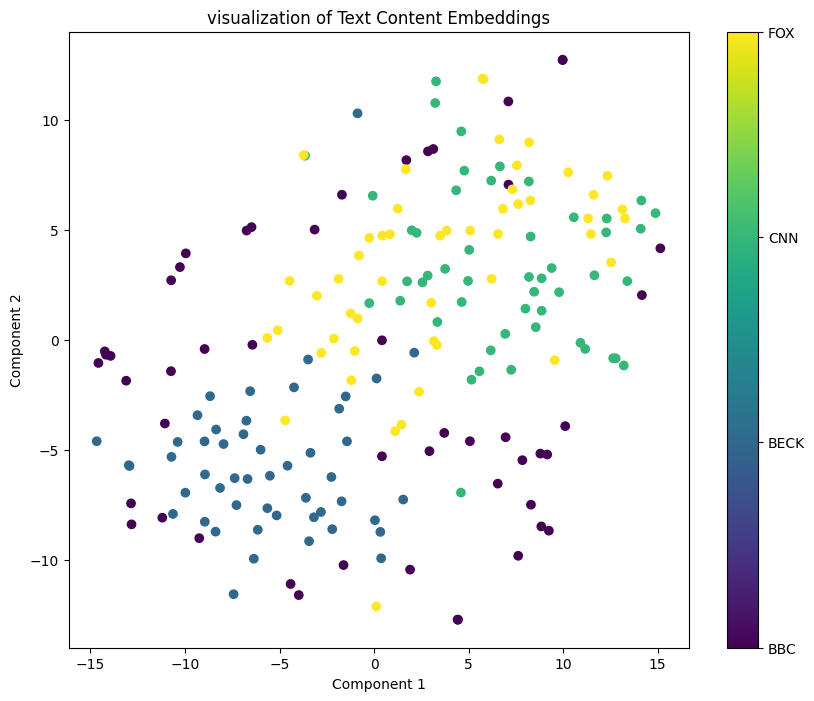

In [24]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

#  Dimensionality Reduction with t-SNE
tsne = TSNE(n_components=2, random_state=15)
X_reduced = tsne.fit_transform(X)

y_codes, uniques = pd.factorize(y_sample)
plt.figure(figsize=(10, 8))

scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_codes, cmap='viridis')
plt.title('visualization of Text Content Embeddings')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Create a color bar with the unique labels
colorbar = plt.colorbar()
colorbar.set_ticks(np.arange(len(uniques)))
colorbar.set_ticklabels(uniques)

plt.show()

Cosine Similarity

In [25]:
from gensim.models.doc2vec import TaggedDocument
import gensim

import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

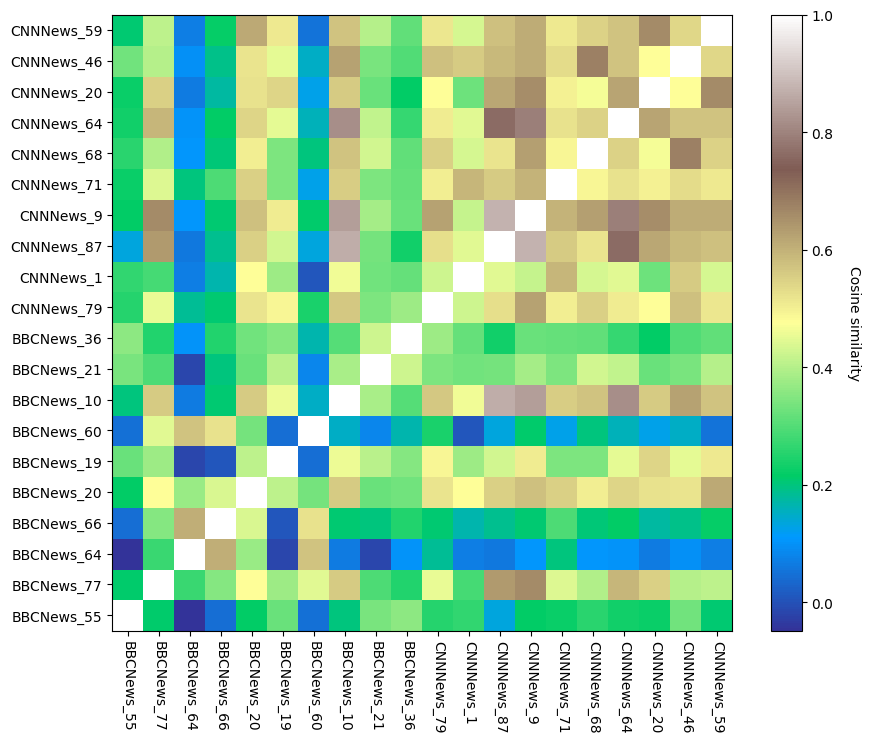

In [26]:
fox_samples = df[df['Category'] == 'BBC'].sample(n=10)

beck_samples = df[df['Category'] == 'CNN'].sample(n=10)

selected_samples = pd.concat([fox_samples, beck_samples])

embeddings = np.stack(selected_samples['Text_Content_Embedding'].values)

similarity_matrix = cosine_similarity(embeddings)


fig, ax = plt.subplots(figsize=(10, 8))
hmap = ax.pcolor(similarity_matrix, cmap='terrain')
cbar = plt.colorbar(hmap, ax=ax)

cbar.set_label('Cosine similarity', rotation=270, labelpad=20)
ax.set_xticks(np.arange(similarity_matrix.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(similarity_matrix.shape[0]) + 0.5, minor=False)

file_names = selected_samples['File_Name'].values
ax.set_xticklabels(file_names, minor=False, rotation=270)
ax.set_yticklabels(file_names, minor=False)

plt.show()

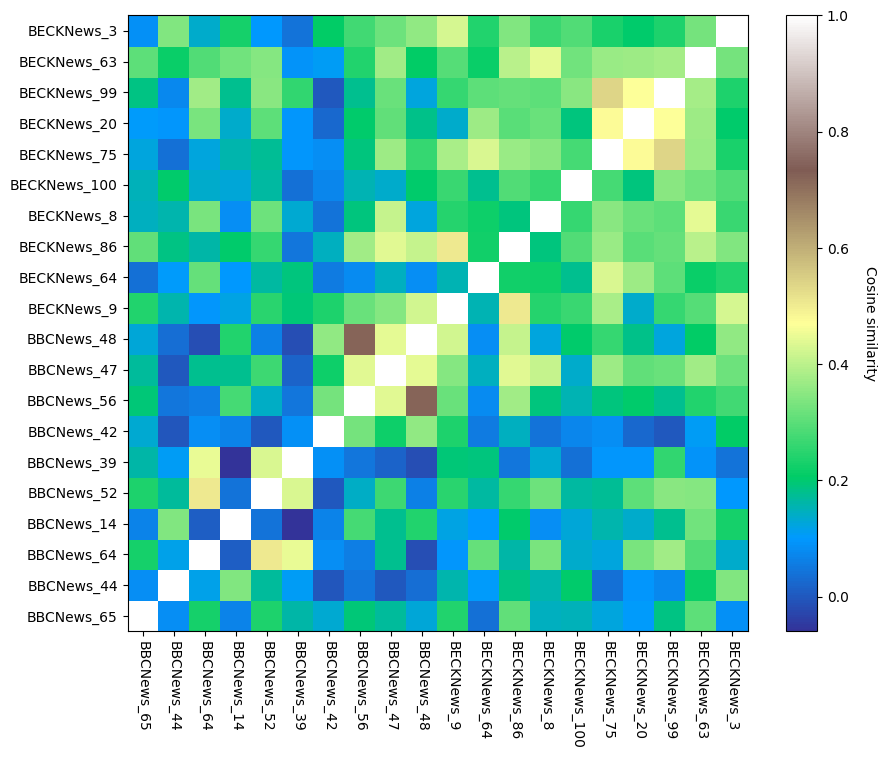

In [27]:
fox_samples = df[df['Category'] == 'BBC'].sample(n=10)

beck_samples = df[df['Category'] == 'BECK'].sample(n=10)

selected_samples = pd.concat([fox_samples, beck_samples])

embeddings = np.stack(selected_samples['Text_Content_Embedding'].values)

similarity_matrix = cosine_similarity(embeddings)


fig, ax = plt.subplots(figsize=(10, 8))
hmap = ax.pcolor(similarity_matrix, cmap='terrain')
cbar = plt.colorbar(hmap, ax=ax)

cbar.set_label('Cosine similarity', rotation=270, labelpad=20)
ax.set_xticks(np.arange(similarity_matrix.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(similarity_matrix.shape[0]) + 0.5, minor=False)

file_names = selected_samples['File_Name'].values
ax.set_xticklabels(file_names, minor=False, rotation=270)
ax.set_yticklabels(file_names, minor=False)

plt.show()

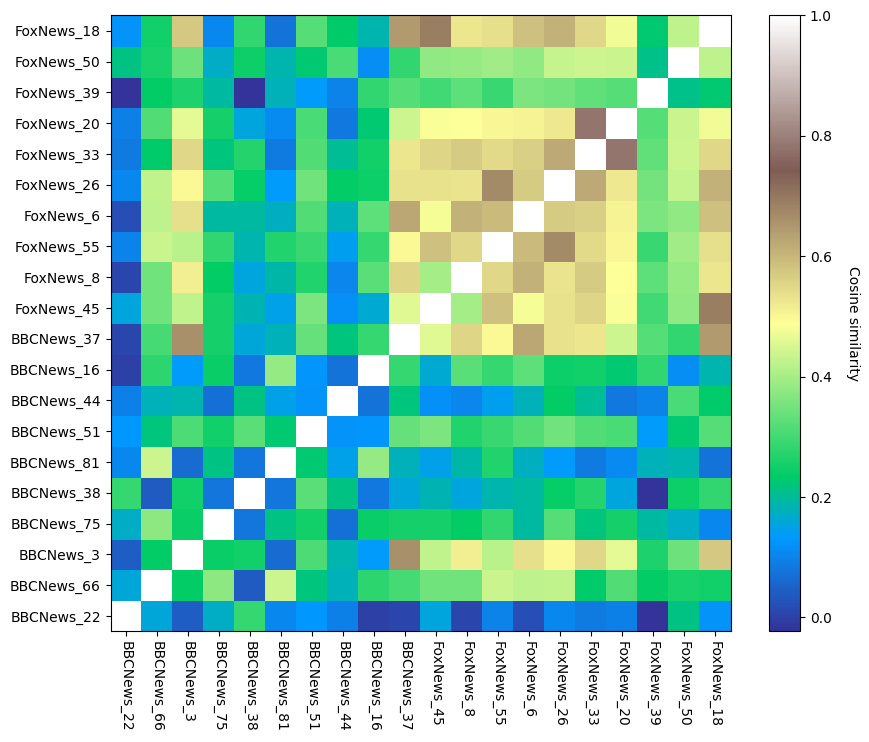

In [28]:
fox_samples = df[df['Category'] == 'BBC'].sample(n=10)

beck_samples = df[df['Category'] == 'FOX'].sample(n=10)

selected_samples = pd.concat([fox_samples, beck_samples])

embeddings = np.stack(selected_samples['Text_Content_Embedding'].values)

similarity_matrix = cosine_similarity(embeddings)


fig, ax = plt.subplots(figsize=(10, 8))
hmap = ax.pcolor(similarity_matrix, cmap='terrain')
cbar = plt.colorbar(hmap, ax=ax)

cbar.set_label('Cosine similarity', rotation=270, labelpad=20)
ax.set_xticks(np.arange(similarity_matrix.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(similarity_matrix.shape[0]) + 0.5, minor=False)

file_names = selected_samples['File_Name'].values
ax.set_xticklabels(file_names, minor=False, rotation=270)
ax.set_yticklabels(file_names, minor=False)

plt.show()

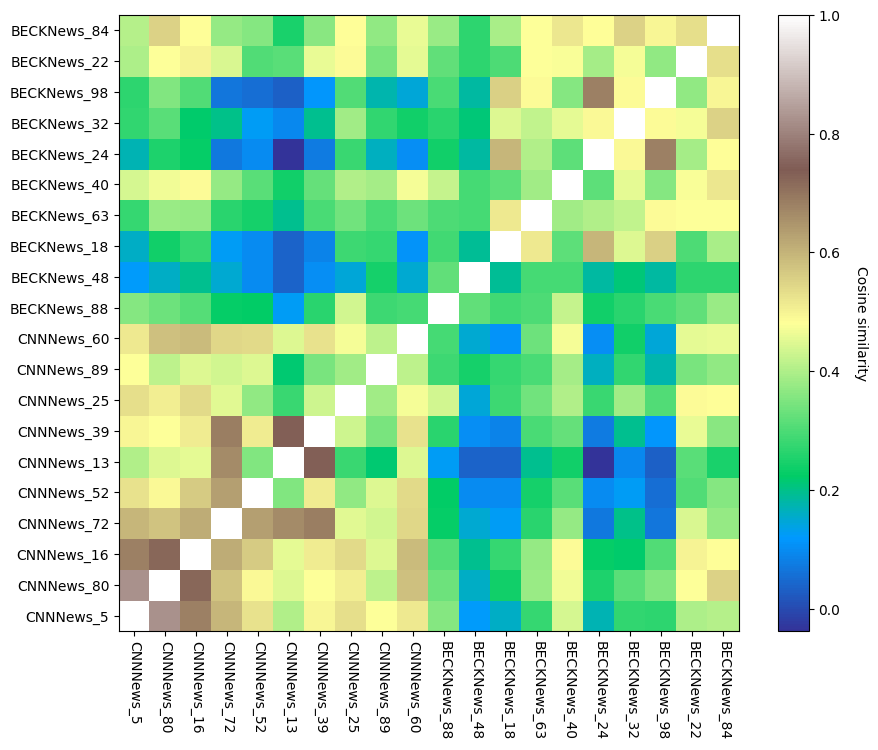

In [29]:
fox_samples = df[df['Category'] == 'CNN'].sample(n=10)

beck_samples = df[df['Category'] == 'BECK'].sample(n=10)

selected_samples = pd.concat([fox_samples, beck_samples])

embeddings = np.stack(selected_samples['Text_Content_Embedding'].values)

similarity_matrix = cosine_similarity(embeddings)


fig, ax = plt.subplots(figsize=(10, 8))
hmap = ax.pcolor(similarity_matrix, cmap='terrain')
cbar = plt.colorbar(hmap, ax=ax)

cbar.set_label('Cosine similarity', rotation=270, labelpad=20)
ax.set_xticks(np.arange(similarity_matrix.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(similarity_matrix.shape[0]) + 0.5, minor=False)

file_names = selected_samples['File_Name'].values
ax.set_xticklabels(file_names, minor=False, rotation=270)
ax.set_yticklabels(file_names, minor=False)

plt.show()

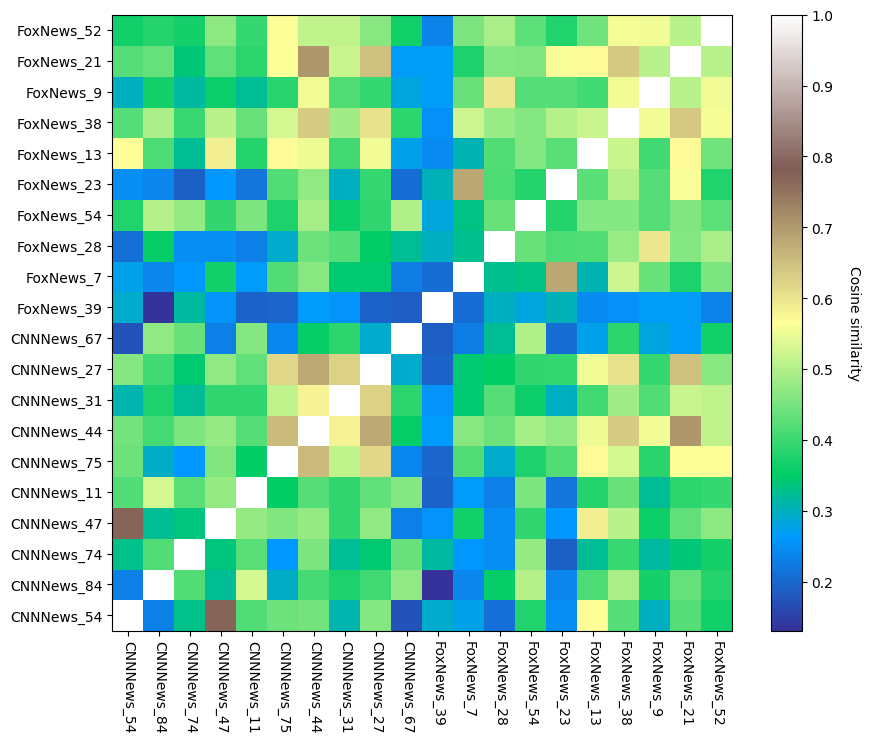

In [30]:
fox_samples = df[df['Category'] == 'CNN'].sample(n=10)

beck_samples = df[df['Category'] == 'FOX'].sample(n=10)

selected_samples = pd.concat([fox_samples, beck_samples])

embeddings = np.stack(selected_samples['Text_Content_Embedding'].values)

similarity_matrix = cosine_similarity(embeddings)


fig, ax = plt.subplots(figsize=(10, 8))
hmap = ax.pcolor(similarity_matrix, cmap='terrain')
cbar = plt.colorbar(hmap, ax=ax)

cbar.set_label('Cosine similarity', rotation=270, labelpad=20)
ax.set_xticks(np.arange(similarity_matrix.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(similarity_matrix.shape[0]) + 0.5, minor=False)

file_names = selected_samples['File_Name'].values
ax.set_xticklabels(file_names, minor=False, rotation=270)
ax.set_yticklabels(file_names, minor=False)

plt.show()

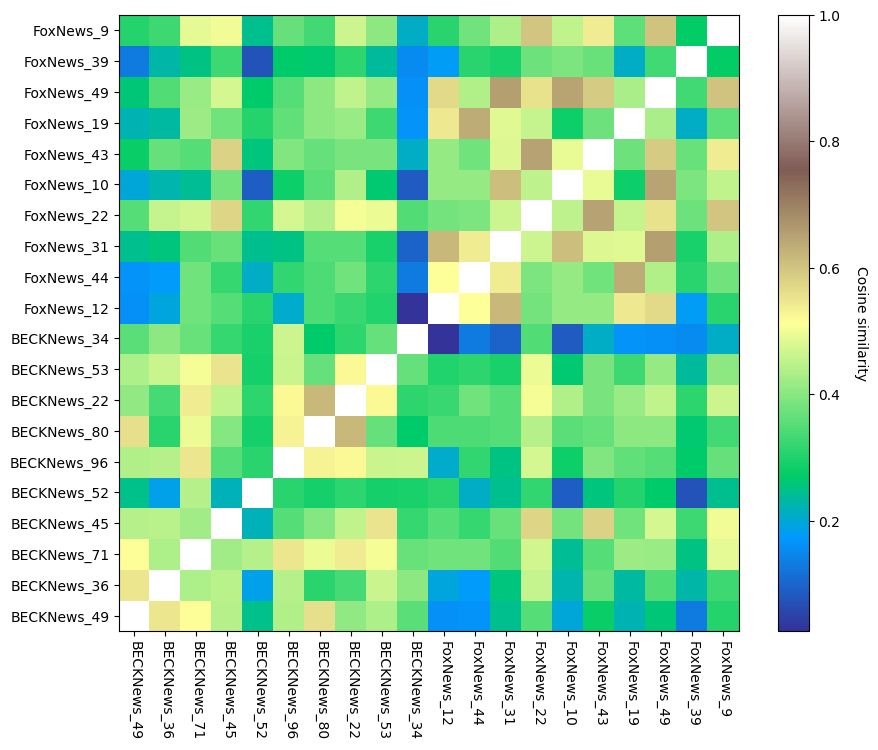

In [31]:
fox_samples = df[df['Category'] == 'BECK'].sample(n=10)

beck_samples = df[df['Category'] == 'FOX'].sample(n=10)

selected_samples = pd.concat([fox_samples, beck_samples])

embeddings = np.stack(selected_samples['Text_Content_Embedding'].values)

similarity_matrix = cosine_similarity(embeddings)


fig, ax = plt.subplots(figsize=(10, 8))
hmap = ax.pcolor(similarity_matrix, cmap='terrain')
cbar = plt.colorbar(hmap, ax=ax)

cbar.set_label('Cosine similarity', rotation=270, labelpad=20)
ax.set_xticks(np.arange(similarity_matrix.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(similarity_matrix.shape[0]) + 0.5, minor=False)

file_names = selected_samples['File_Name'].values
ax.set_xticklabels(file_names, minor=False, rotation=270)
ax.set_yticklabels(file_names, minor=False)

plt.show()

LLM Training

In [ ]:
base_model = "NousResearch/Llama-2-7b-chat-hf"
compute_dtype = getattr(torch, "float16")

quant_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=compute_dtype,
    bnb_4bit_use_double_quant=False,
)

# Load base model
# Model from Hugging Face hub
base_model = "NousResearch/Llama-2-7b-chat-hf"

# New instruction dataset
dataset = load_dataset("glue", "sst2")['train']

# Fine-tuned model
new_model = "llama-2-7b-cyt"
# Load base model
model = AutoModelForCausalLM.from_pretrained(
    base_model,
    quantization_config=quant_config,
    device_map={"": 0}
)
model.config.use_cache = False
model.config.pretraining_tp = 1

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:410: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:415: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuratio

In [ ]:
import pandas as pd
from datasets import Dataset

tokenizer = AutoTokenizer.from_pretrained(base_model, trust_remote_code=True)
tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = "right"
# Load LoRA configuration
peft_args = LoraConfig(
    lora_alpha=16,
    lora_dropout=0.1,
    r=32, # the rank of the adaptation
    bias="none",
    task_type="CAUSAL_LM",
)
training_params = TrainingArguments(
    output_dir="./results",
    num_train_epochs=10,
    per_device_train_batch_size=1,
    gradient_accumulation_steps=1,
    optim="paged_adamw_32bit",
    save_steps=200,
    logging_steps=200,
    learning_rate=2e-4,
    weight_decay=0.001,
    fp16=True, # speed up
    bf16=False,
    max_grad_norm=0.3,
    max_steps=-1,
    warmup_ratio=0.03,
    group_by_length=True,
    lr_scheduler_type="constant",
    report_to="tensorboard"
)
df = pd.read_csv('./data/trainset.csv')
#dataset = load_dataset("glue", "sst2")['train'].select(range(8000))
dataset = Dataset.from_pandas(df)
# Set supervised fine-tuning parameters
trainer = SFTTrainer(
    model=model,
    train_dataset=dataset,
    peft_config=peft_args,
    dataset_text_field="Text_Content",
    max_seq_length=None,
    tokenizer=tokenizer,
    args=training_params,
    packing=False,
)

/usr/local/lib/python3.10/dist-packages/trl/trainer/sft_trainer.py:225: UserWarning: You didn't pass a `max_seq_length` argument to the SFTTrainer, this will default to 1024
  warnings.warn(


Map:   0%|          | 0/292 [00:00<?, ? examples/s]

In [ ]:
new_model = "llama-2-7b-cyt"
trainer.train()
trainer.model.save_pretrained(new_model)
trainer.tokenizer.save_pretrained(new_model)

Step,Training Loss
200,2.274100
400,2.046400
600,1.853600
800,1.588100
1000,1.422900
1200,1.213700
1400,0.964000
1600,0.748500
1800,0.640700
2000,0.489000


Checkpoint destination directory ./results/checkpoint-200 already exists and is non-empty. Saving will proceed but saved results may be invalid.


('llama-2-7b-cyt/tokenizer_config.json',
 'llama-2-7b-cyt/special_tokens_map.json',
 'llama-2-7b-cyt/tokenizer.model',
 'llama-2-7b-cyt/added_tokens.json',
 'llama-2-7b-cyt/tokenizer.json')

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer, TextGenerationPipeline

base_model = "NousResearch/Llama-2-7b-chat-hf"

# Fine-tuned model
new_model = "llama-2-7b-cyt"

# Reload model in FP16 and merge it with LoRA weights
load_model = AutoModelForCausalLM.from_pretrained(
    base_model,
    low_cpu_mem_usage=True,
    return_dict=True,
    torch_dtype=torch.float16,
    device_map={"": 0},
)

model = PeftModel.from_pretrained(load_model, new_model)
model = model.merge_and_unload()

# Reload tokenizer to save it
tokenizer = AutoTokenizer.from_pretrained(base_model, trust_remote_code=True)
tokenizer.add_special_tokens({'pad_token': '[PAD]'})
tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = "right"

# Create the text generation pipeline manually
pipe = TextGenerationPipeline(model=model, tokenizer=tokenizer, task="text-generation", max_length=200)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:410: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:415: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuratio

In [ ]:
prompt = "Given the sequence, predict the score within the range of  minus -10 (extreme anti-abortion sentiment) to 10 (extreme pro-abortion sentiment). {}"
prompt = prompt.format("A new study finds that in states with certain restrictive abortion laws, even before the US Supreme Court overturned Roe v. Wade, the number of children whose parents couldn't or wouldn't care for them increased and their children end up in foster care.        Opinion: The right-wing's opposition to abortion is not about saving or protecting women lives               The study, published Monday in JAMA Pediatrics, found that there was an 11% increase in children placed in foster care in states with certain abortion restrictions called TRAP laws, following the enactment of those TRAP laws, relative to states without such abortion restrictions. The study saw this increase by comparing the number of children who were conceived between 1990 and 2011 and placed in foster care between 2000 and 2020 in states with TRAP laws to those who lived in states without such laws. More than 4 million children went into foster care during this time period. Black children disproportionately got placed in foster care.                   TRAP stands for Targeted Restrictions on Abortion Providers. Ever since abortion became legal in 1973, states found ways to create laws that reduce access to abortion by restricting what clinics can and can't do. Often restrictions become so burdensome, down to prescribing how long a hall in a clinic must be, clinics shut down. So, people seeking an abortion in these states may have a right to an abortion, but finding one is impossible. Twenty-three states have such restrictions.                   Anti-abortion politicians often argue TRAP laws protect mothers and children, but multiple studies and courts have found that the laws do not make the procedure any safer.                   Compared to people who live in states without abortion access issues, studies have consistently shown that pregnant people who live in abortion-restrictive states typically face more problems, some of them are even deadly. People are much more likely to die in childbirth or die due to a pregnancy-related issues, particularly people of color who live in abortion restricted states, earlier studies have shown and so are their infants. People denied abortions are also much more likely to experience financial distress.    Opinion: The Dobbs effect isn't just galvanizing voters, it's creating candidates               An 11% increase in the number of children put into foster care may not sound like a lot, but the foster care system is already overburdened. The situation became even more stressed during the pandemic. In 2022, more than half of all states saw a significant decline in the number of available foster care homes, one study showed. So, even an 11% increase could push the system into further jeopardy.                   With the Supreme Court decision to overturn Roe v. Wade, the situation isn't likely to improve, according to study coauthor Dr. Savannah Atkins, a lecturer in Economics at Bentley University.                   Now with a total restriction of abortion in certain states, we're obviously going to see this being exacerbated, said Atkins. We need to take into account these effects when we're thinking of these, you know, sweeping legislations that regulate abortion.        See where abortions are banned and legal and where it's still in limbo.")
result = pipe(f"<s>[INST] {prompt[:3000]} [/INST]")
print(result[0]['generated_text'].split('[/INST]')[1])

  Based on the sequence provided, I predict a score of 4.0 (Democratic).
